(adapted from Zach's and Isaac's slides)

# Exploratory Data Analysis (EDA)

* In order to answer a question using data, you must first *understand* your data.
* EDA helps you understand your data.

# Key EDA Questions

* What are the feature names and types?
* Are values missing?
* Which features are continuous and which are categorical?
* What is the distribution of the features?
* What is the distribution of the target?
* How do the features relate to the target?
* How do the variables relate to each other?



In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
# Load your data
cars = pd.read_csv('data/cars_multivariate.csv')

# Examine first few rows

In [15]:
cars.head()
# cars.info()
# cars.shape
# cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
2,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
3,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
4,17,8,302,140.0,3449,10.5,70,1,ford torino


In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [17]:
cars.shape

(398, 9)

In [18]:
cars.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# Are values missing?

In [20]:
cars.info()
# Why is "horsepower" an object instead of float64?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


In [42]:
# TODO: show how to find/replace/ignore missing values
## Let's just drop those rows
# Force convert horsepower to numeric
cars = pd.read_csv('data/cars_multivariate.csv', na_values=['?'])
# TODO: cast to correct data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


/Library/Python/2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


# Which features are continuous and which are categorical?

In [32]:
cars.info()
# 6 continuous, 3 categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


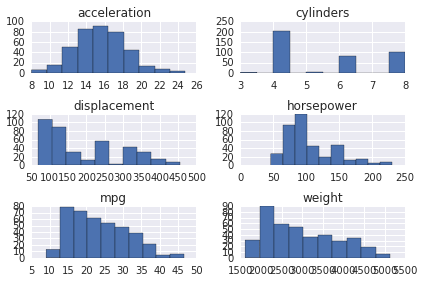

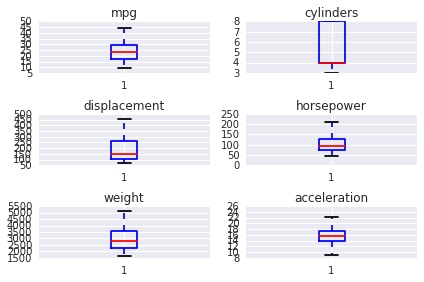

In [60]:
# Histograms
numeric_features = ['mpg','cylinders','displacement','horsepower','weight','acceleration']
ax = cars[numeric_features].hist(bins=10)
plt.tight_layout()
# Boxplots
fig, axes = plt.subplots(3,2)
for ax, var in zip(axes.ravel(), numeric_features):
    ax.boxplot(cars[var])
    ax.set_title(var)
plt.tight_layout()

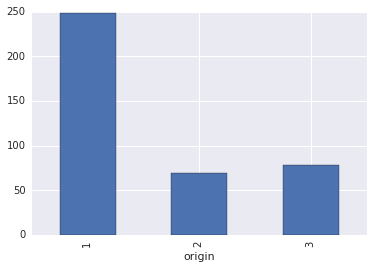

In [59]:
# Categorical
agg = cars.groupby('origin').apply(len)
agg.plot(kind='bar')

origin  cylinders
1       4            27.840278
        6            19.663514
        8            14.963107
2       4            28.411111
        5            27.366667
        6            20.100000
3       3            20.550000
        4            31.595652
        6            23.883333
Name: mpg, dtype: float64
cylinders      3          4          5          6          8
origin                                                      
1            NaN  27.840278        NaN  19.663514  14.963107
2            NaN  28.411111  27.366667  20.100000        NaN
3          20.55  31.595652        NaN  23.883333        NaN


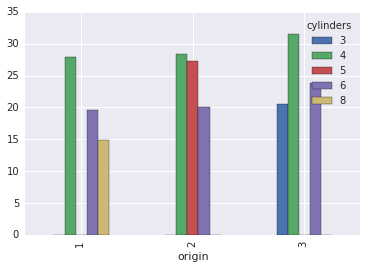

In [58]:
# Categorical vs categorical vs numeric
agg = cars.groupby(['origin','cylinders'])['mpg'].mean()
print agg
agg = agg.unstack(level='cylinders')
print agg
agg.plot(kind='bar')

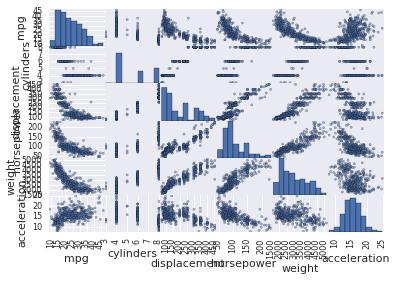

In [57]:
# Scatterplot matrix
from pandas.tools.plotting import scatter_matrix
ax = scatter_matrix(cars[numeric_features])


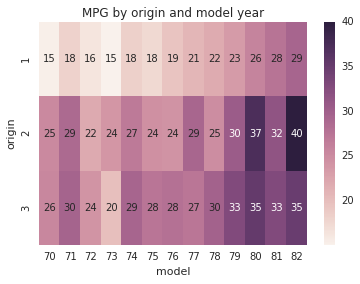

In [62]:
# Heat-map
agg = cars.groupby(['origin','model'])['mpg'].mean()
ax = sns.heatmap(agg.unstack(level='model'), annot=True)
ax.set_title('MPG by origin and model year')w